In [1]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 4.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


## Inserção de dados e tratamento de dados

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'

dados = pd.read_csv(url)
print(dados.shape) #apresenta as dimensões do conjunto de dados(linhas, colunas)
dados.head() #1=Sim e 0=não

(7043, 18)


,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


# Mudanças de variáveis Categóricas
- 'Sim': 1,
- 'Nao': 0

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
a_mudar = {
    'Sim': 1,
    'Nao': 0
}


dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(a_mudar)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [5]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [6]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


**Informações para classificação**

X = inputs (dados de entrada)

y = outputs (dados de saída)

In [7]:
dados.shape

(7043, 18)

<AxesSubplot:xlabel='Churn', ylabel='count'>

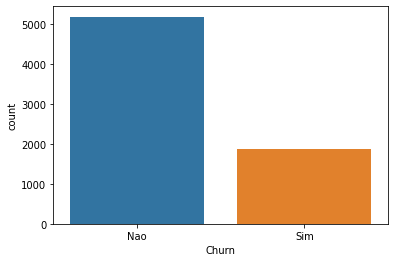

In [8]:
import seaborn as sns

sns.countplot(x = 'Churn', data = dados)

In [9]:
#Contagem da quantidade de valores 0 e 1 da cluna Churn
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

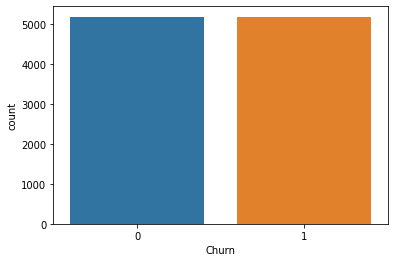

In [10]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

from imblearn.over_sampling import SMOTE

x = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']


smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
x, y = smt.fit_resample(x, y)  # Realiza a reamostragem do conjunto de dados

dados_final = pd.concat([x, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.


ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [11]:
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [12]:
dados_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Método de KNN


1.   Receber informações
2.   Calcular as distâncias
3.   Ordenar da menor distância para a maior
4.   Fazer uma contagem das classes
5.   Classificar a partir dos K-vizinhos
6.   Definir o churn


## Pontos importantes
A classificação é interferida pelo valor de k

1. K muito pequeno -> Overfitting
2. K muito grande -> Underfitting
3. **IMPORTANTE:** Devemos deixar todos os valores na mesma escala


In [13]:
x_maria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [14]:
#y_maria = 

In [15]:
#divisão em inputs e outputs
x = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [16]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

x_normalizado = norm.fit_transform(x)
x_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

In [17]:
x_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

In [24]:
#O conjunto só é normalizado quando estiver em um conjunto bidimensional -> DataFrame
# columns = x.columns pena o nome das colunas do dataset original
x_maria = pd.DataFrame(x_maria, columns = x.columns)
x_maria

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,0,1,1,0,0,39.9,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [25]:
#normalização do conjunto de dados
x_maria_normalizado = norm.transform(x_maria)
x_maria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

Cálculo da distância euclidiana

In [26]:
import numpy as np

In [28]:
a = x_maria_normalizado
b = x_normalizado

# 1 - começamos subtraindo
a - b

# 2 - exponenciação
exp = np.square(a-b)

# 3 - Soma
# 4. tirar a raiz
np.sqrt(np.sum(exp))

923.0279274171561

# Implementando, treinando e testando o modelo

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Separação de dados para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size = 0.3, random_state = 123)

#treinamento do modelo
knn = KNeighborsClassifier(metric = 'euclidean')
knn.fit(x_treino, y_treino)



KNeighborsClassifier(metric='euclidean')

In [43]:

from sklearn.metrics import accuracy_score

#testando o modelo com os dados de teste
predito_knn = knn.predict(x_teste)
predito_knn

#teste do modelo
acuracia = accuracy_score(y_teste, predito_knn) * 100
print("A acurácia do modelo foi de %.2f%%" % acuracia)

A acurácia do modelo foi de 81.48%


Modelo Berboulli

In [33]:
x_treino


array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215]])

In [34]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [36]:
mediana = np.median(x_treino)

In [42]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score


bnb = BernoulliNB(binarize=mediana)
bnb.fit(x_treino, y_treino)

predito_Bnb = bnb.predict(x_teste)

#teste do modelo
acuracia = accuracy_score(y_teste, predito_Bnb) * 100
print("A acurácia do modelo foi de %.2f%%" % acuracia)

A acurácia do modelo foi de 75.43%


In [38]:
predito_Bnb

array([1, 0, 0, ..., 1, 1, 1])

# Árvore de decisão
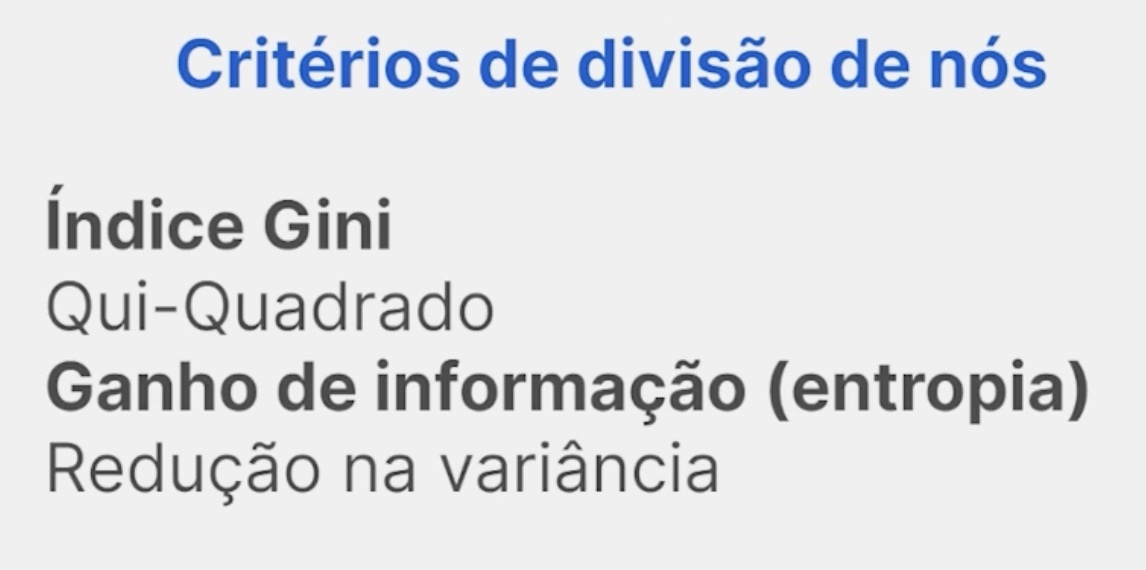

In [45]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

dtc.fit(x_treino, y_treino)


predito_arvoreDecisao = dtc.predict(x_teste)

#teste do modelo
acuracia = accuracy_score(y_teste, predito_arvoreDecisao) * 100
print("A acurácia do modelo foi de %.2f%%" % acuracia)

A acurácia do modelo foi de 80.77%


In [46]:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

# Validação dos modelos

## Matriz de confusão
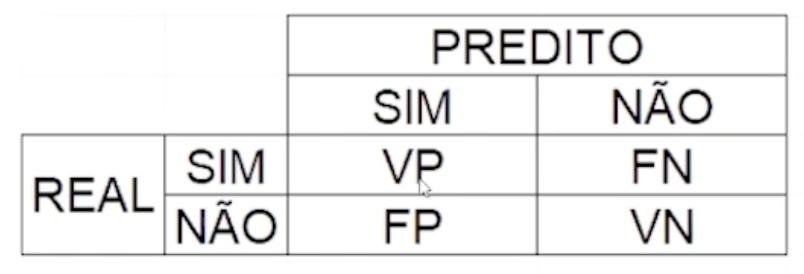

In [47]:
from sklearn.metrics import confusion_matrix

In [49]:
print(confusion_matrix(y_teste, predito_knn))
print(confusion_matrix(y_teste, predito_Bnb))
print(confusion_matrix(y_teste, predito_arvoreDecisao))

[[1241  328]
 [ 247 1289]]
[[1048  521]
 [ 242 1294]]
[[1249  320]
 [ 277 1259]]


# Tipos de métrica

## Acurácia

In [53]:
from sklearn.metrics import accuracy_score
#teste do modelo
acuracia = accuracy_score(y_teste, predito_knn) * 100
print("A acurácia do modelo KNN foi de %.2f%%" % acuracia)

#teste do modelo
acuracia = accuracy_score(y_teste, predito_Bnb) * 100
print("A acurácia do modelo BNB foi de %.2f%%" % acuracia)

#teste do modelo
acuracia = accuracy_score(y_teste, predito_arvoreDecisao) * 100
print("A acurácia do modelo Arvore de decisão foi de %.2f%%" % acuracia)

A acurácia do modelo KNN foi de 81.48%
A acurácia do modelo BNB foi de 75.43%
A acurácia do modelo Arvore de decisão foi de 80.77%


## Precisão

Com base na quantidade de verdadeiros positivos 

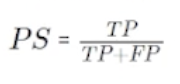

In [56]:
from sklearn.metrics import precision_score

precisao = precision_score(y_teste, predito_knn) * 100
print("A precisao do modelo KNN foi de %.2f%%" % precisao)

precisao = precision_score(y_teste, predito_Bnb) * 100
print("A acurácia do modelo BNB foi de %.2f%%" % precisao)

precisao = precision_score(y_teste, predito_arvoreDecisao) * 100
print("A precisao do modelo Arvore de decisão foi de %.2f%%" % precisao)

A precisao do modelo KNN foi de 79.72%
A acurácia do modelo BNB foi de 71.29%
A precisao do modelo Arvore de decisão foi de 79.73%


## Recall

Outra métrica importante é a Recall ou revocação ou ainda sensibilidade, que calcula o quão bom o modelo está para classificar corretamente
um resultado positivo (TP).

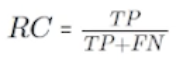



In [58]:
from sklearn.metrics import recall_score

recall = recall_score(y_teste, predito_knn) * 100
print("A precisao do modelo KNN foi de %.2f%%" % recall)

recall = recall_score(y_teste, predito_Bnb) * 100
print("A acurácia do modelo BNB foi de %.2f%%" % recall)

recall = recall_score(y_teste, predito_arvoreDecisao) * 100
print("A precisao do modelo Arvore de decisão foi de %.2f%%" % recall)

A precisao do modelo KNN foi de 83.92%
A acurácia do modelo BNB foi de 84.24%
A precisao do modelo Arvore de decisão foi de 81.97%
